In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib as plt
import sklearn 
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.utils import resample
%matplotlib inline

In [2]:
filepath='c://Users/EXIR/Downloads/heart.csv'

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
object_columns = df.select_dtypes('object').columns
number_columns = df.select_dtypes('number').columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df[object_columns].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [9]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


# visualisations

In [10]:
df.pivot_table('HeartDisease', index='Sex', columns='ChestPainType', aggfunc='sum')

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,39,4,6,1
M,353,20,66,19


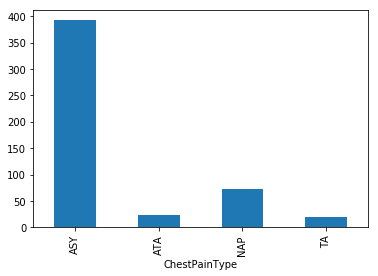

In [11]:
df.groupby('ChestPainType')['HeartDisease'].sum().plot(kind='bar')

In [12]:
df.pivot_table('HeartDisease', index='Sex', columns='RestingECG', aggfunc='sum')

RestingECG,LVH,Normal,ST
Sex,,,
F,14,29,7
M,92,256,110


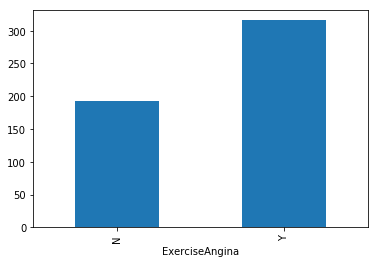

In [13]:
df.groupby('ExerciseAngina')['HeartDisease'].sum().plot(kind='bar')

In [14]:
df.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina', aggfunc='sum')

ExerciseAngina,N,Y
Sex,,
F,23,27
M,169,289


In [15]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['ST_Slope'])
df = one_hot_encoded_df


In [16]:
df['ChestPainType'].replace({'ASY':1, 'NAP':2, 'ATA':3,'TA':4}, inplace=True)
df['RestingECG'].replace({'Normal':1, 'LVH':2, 'ST':3}, inplace=True)
df['Sex'].replace({'F':0, 'M':1}, inplace=True)
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)

In [17]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df["Cholesterol"].replace({0:df["Cholesterol"].median()}, inplace=True)
df["RestingBP"].replace({0:df["RestingBP"].median()}, inplace=True)

In [19]:
df['AgeGroup'] = pd.cut(x=df['Age'],bins=[19,35,55,65,100],labels=[0,1,2,3])


In [20]:
df=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','HeartDisease']]

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,1,3,140.0,289.0,0,1,172,0,0.0,0,0,1,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,0,1,0,1
2,37,1,3,130.0,283.0,0,3,98,0,0.0,0,0,1,0
3,48,0,1,138.0,214.0,0,1,108,1,1.5,0,1,0,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,0,0,1,0


In [22]:
def show_outliers(a):   
    print(df[a].describe())
    print('\n')
    y=df[a]
    y=pd.DataFrame(y)
    q1=y.quantile(0.25)
    q3=y.quantile(0.75)
    IQR=q3[0]-q1[0]
    upper_limit=q3[0]+(1.5*IQR)
    lower_limit=q1[0]-(1.5*IQR)
    outliers=[]
    for z in df[a]:
        z = round(z,2)
        if z<lower_limit or z>upper_limit :
            outliers.append(z)
    print(f'{a} outliers list ={outliers}=\n')
    return()

In [23]:
num_col=['RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in num_col:
    show_outliers(i)

count    918.000000
mean     132.538126
std       17.990127
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64


RestingBP outliers list =[190.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 180.0, 80.0, 200.0, 185.0, 200.0, 180.0, 180.0, 178.0, 172.0, 180.0, 190.0, 174.0, 178.0, 180.0, 200.0, 192.0, 178.0, 180.0, 180.0, 172.0]=

count    918.000000
mean     240.581699
std       53.982967
min       85.000000
25%      214.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


Cholesterol outliers list =[468.0, 518.0, 365.0, 412.0, 529.0, 100.0, 85.0, 392.0, 466.0, 129.0, 393.0, 388.0, 603.0, 404.0, 132.0, 117.0, 355.0, 491.0, 394.0, 126.0, 347.0, 358.0, 100.0, 458.0, 384.0, 349.0, 113.0, 110.0, 123.0, 369.0, 385.0, 564.0, 407.0, 417.0, 126.0, 354.0, 360.0, 409.0, 394.0, 353.0, 131.0]=

count    918.000000
mean     136.809368
std       25.460334
min       60.00000

In [24]:
droplist=[]
for a in ['RestingBP','Cholesterol','MaxHR','Oldpeak'] :
    y=df[a]
    y=pd.DataFrame(y)
    q1=y.quantile(0.25)
    q3=y.quantile(0.75)
    IQR=q3[0]-q1[0]
    upper_limit=q3[0]+(1.5*IQR)
    lower_limit=q1[0]-(1.5*IQR)
    c=0
    for z in df[a]:
        if z<lower_limit or z>upper_limit :
            droplist.append(c)
        c=c+1
droplist= set(droplist)

print(droplist)       
df1=df.drop(labels=droplist, axis=0,inplace=True)
 

{521, 522, 537, 28, 541, 30, 550, 559, 58, 571, 573, 577, 68, 69, 585, 76, 78, 592, 98, 613, 102, 103, 616, 108, 109, 624, 123, 132, 149, 667, 673, 675, 166, 686, 182, 189, 190, 702, 208, 725, 732, 738, 227, 238, 241, 759, 250, 256, 771, 774, 263, 775, 780, 274, 275, 278, 791, 284, 796, 803, 314, 324, 850, 855, 872, 365, 880, 370, 372, 900, 390, 908, 399, 915, 411, 423, 444, 475, 496, 498, 500}


e:\Users\EXIR\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:

def minimax_norm(a):
    min_1=a.min()
    max_1=a.max()
    distance=max_1-min_1
    final=(a-min_1)/distance
    return final
def ordinal_norm(a):
    max_1=a.max()
    distance=max_1-1
    final=(a-1)/distance
    return final

In [26]:
minimax_norm_need=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
ordinal_norm_need=['ChestPainType','RestingECG',]
for i in minimax_norm_need:
    df[i]= minimax_norm(df[i])
for i in ordinal_norm_need:
    df[i]= ordinal_norm(df[i])


e:\Users\EXIR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
e:\Users\EXIR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.229167,1,0.666667,0.605263,0.731707,0,0.0,0.777778,0,0.350877,0,0,1,0
1,0.416667,0,0.333333,0.868421,0.200000,0,0.0,0.659259,0,0.526316,0,1,0,1
2,0.166667,1,0.666667,0.473684,0.702439,0,1.0,0.229630,0,0.350877,0,0,1,0
3,0.395833,0,0.000000,0.578947,0.365854,0,0.0,0.303704,1,0.614035,0,1,0,1
4,0.520833,1,0.333333,0.736842,0.273171,0,0.0,0.407407,0,0.350877,0,0,1,0
5,0.208333,1,0.333333,0.342105,0.975610,0,0.0,0.762963,0,0.350877,0,0,1,0
6,0.333333,0,0.666667,0.473684,0.478049,0,0.0,0.762963,0,0.350877,0,0,1,0
7,0.520833,1,0.666667,0.210526,0.336585,0,0.0,0.555556,0,0.350877,0,0,1,0
8,0.166667,1,0.000000,0.605263,0.331707,0,0.0,0.466667,1,0.614035,0,1,0,1
9,0.395833,0,0.666667,0.342105,0.707317,0,0.0,0.392593,0,0.350877,0,0,1,0


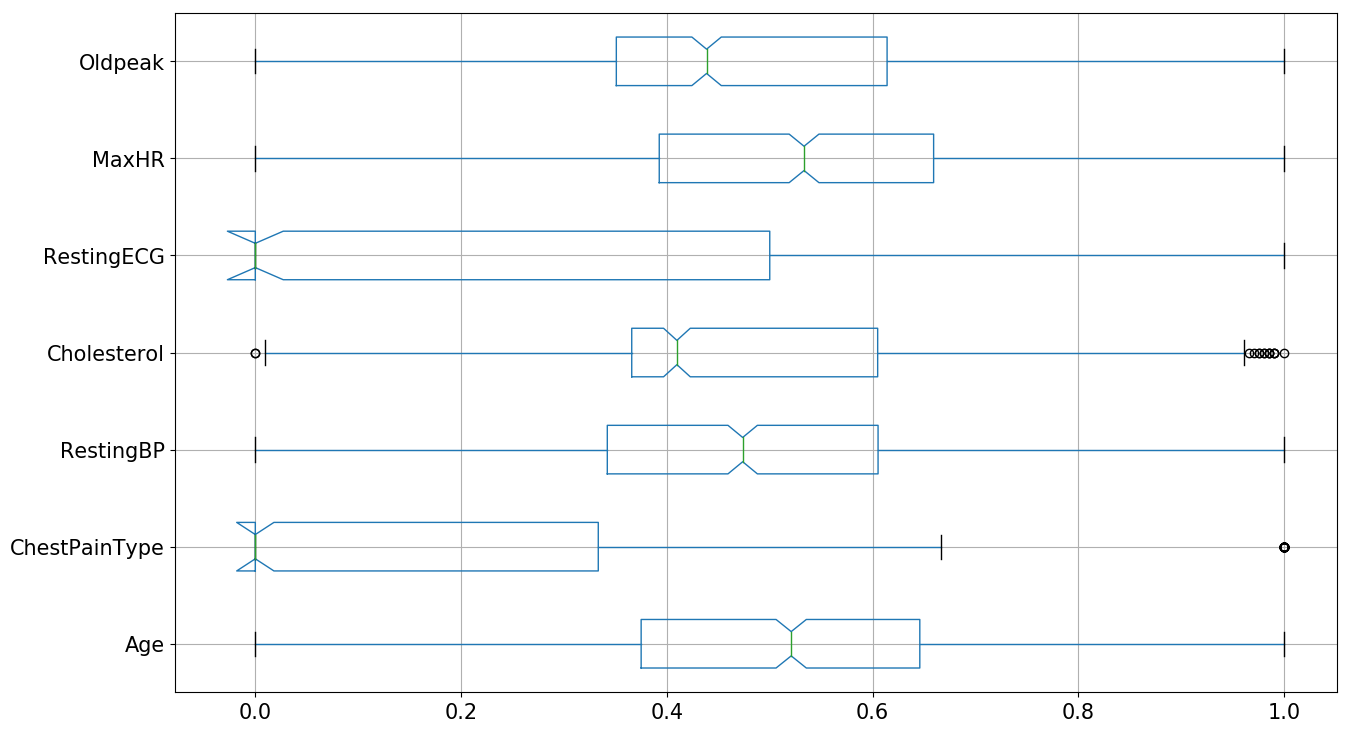

In [28]:
plt.figure(figsize=(15,9),dpi=100)
boxplot=df.boxplot(column=['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG', 'MaxHR', 'Oldpeak'],fontsize=15,notch ='True', vert = 0)
boxplot

# Correlation Matrix


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
Age,1.000000,0.081075,-0.159707,0.271902,0.049868,0.192218,0.209970,-0.402308,0.214701,0.258621,0.110406,0.206331,-0.260416,0.291072
Sex,0.081075,1.000000,-0.180081,0.051302,-0.087689,0.119552,0.043482,-0.180766,0.210297,0.135354,0.066411,0.130943,-0.163523,0.318842
ChestPainType,-0.159707,-0.180081,1.000000,-0.002401,-0.011033,-0.121130,-0.067855,0.345500,-0.421479,-0.251699,-0.080356,-0.302782,0.343181,-0.477310
RestingBP,0.271902,0.051302,-0.002401,1.000000,0.041799,0.050980,0.105271,-0.105311,0.151454,0.182905,-0.022582,0.117769,-0.107791,0.110997
Cholesterol,0.049868,-0.087689,-0.011033,0.041799,1.000000,-0.015501,-0.011930,0.044421,0.087195,0.064607,-0.040126,0.060973,-0.042238,0.051342
FastingBS,0.192218,0.119552,-0.121130,0.050980,-0.015501,1.000000,0.117646,-0.146953,0.069461,0.089996,0.112430,0.109561,-0.163956,0.282862
RestingECG,0.209970,0.043482,-0.067855,0.105271,-0.011930,0.117646,1.000000,-0.101578,0.108581,0.084460,0.041998,0.050847,-0.071234,0.112246
MaxHR,-0.402308,-0.180766,0.345500,-0.105311,0.044421,-0.146953,-0.101578,1.000000,-0.392540,-0.175966,-0.067383,-0.357686,0.392267,-0.406759
ExerciseAngina,0.214701,0.210297,-0.421479,0.151454,0.087195,0.069461,0.108581,-0.392540,1.000000,0.422314,0.138441,0.394463,-0.463202,0.496597
Oldpeak,0.258621,0.135354,-0.251699,0.182905,0.064607,0.089996,0.084460,-0.175966,0.422314,1.000000,0.235065,0.341588,-0.456079,0.411348


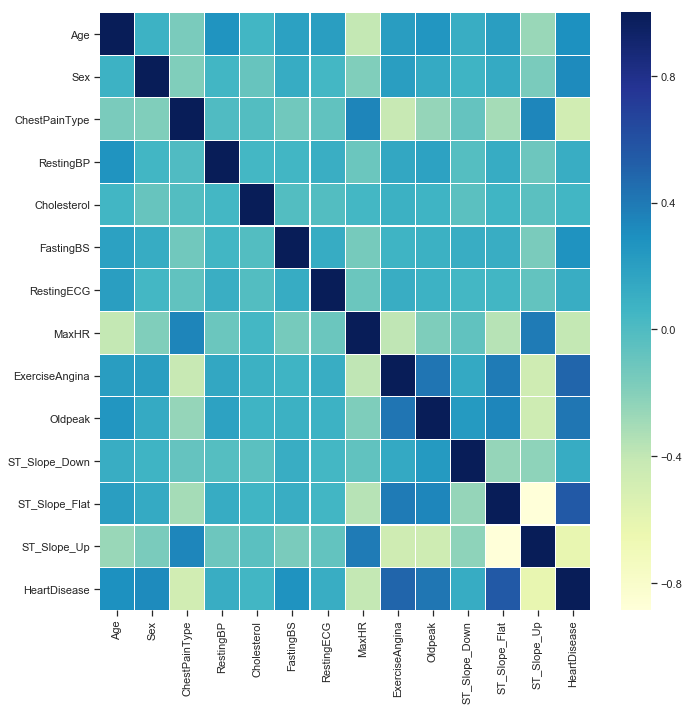

In [29]:
sns.set(style="ticks", color_codes=True)
corrmat = df.corr()
f, ax = plt.subplots(figsize =(11, 11))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
corrmat

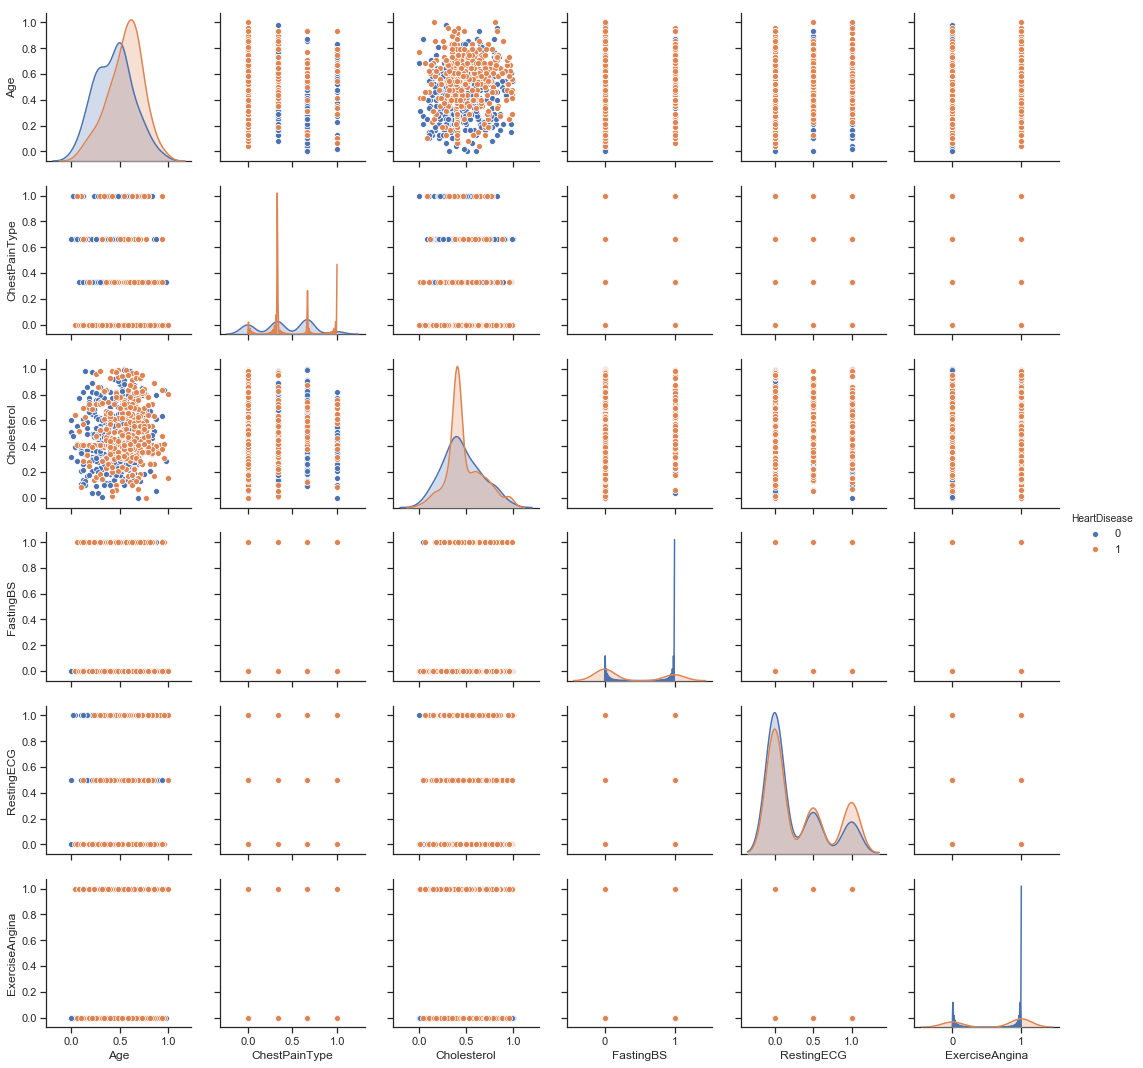

In [30]:

sns.pairplot(df,hue='HeartDisease',vars=['Age','ChestPainType','Cholesterol','FastingBS','RestingECG','ExerciseAngina'])

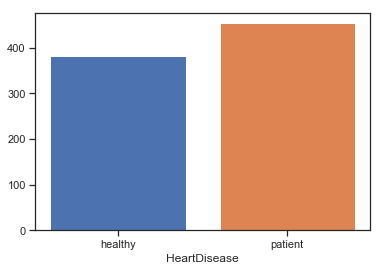

In [31]:

healthy=df[df.HeartDisease==0].shape[0]
patient=df[df.HeartDisease==1].shape[0]
plt.bar(1,healthy)
plt.bar(2,patient)
plt.xticks([1,2],['healthy','patient'])
plt.xlabel('HeartDisease')
plt.show()

# balancing data

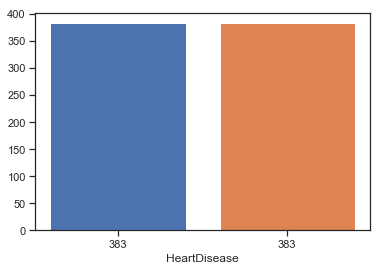

In [32]:

healthy = df[df.HeartDisease==0]
patient_0 = df[df.HeartDisease==1] 

patient = resample(patient_0, replace=True, n_samples=len(healthy))

balancedata = pd.concat([patient, healthy])

healthy=balancedata[balancedata.HeartDisease==0].shape[0]
patient=balancedata[balancedata.HeartDisease==1].shape[0]
plt.bar(1,healthy)
plt.bar(2,patient)
plt.xticks([1,2],[healthy,patient])
plt.xlabel('HeartDisease')
plt.show()


# Train and Test

In [33]:

x = balancedata.drop('HeartDisease', axis=1)
y = balancedata['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y)

trainset = pd.concat([X_train, y_train], axis=1)


In [34]:
x.shape,y.shape, X_train.shape , y_train.shape 

((766, 13), (766,), (574, 13), (574,))

# SVM Model


In [35]:

svclassifier = SVC(C=1.0,gamma='scale',kernel='linear').fit(X_train, y_train)


y_pred = svclassifier.predict(X_test)
print("confusion_matrix:\n")
print(confusion_matrix(y_test,y_pred))
print('\nclassification_report:\n')
print(classification_report(y_test,y_pred))

print('Accuracy=',svclassifier.score(X_test, y_test).round(3)*100,('%'))


confusion_matrix:

[[79 17]
 [17 79]]

classification_report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        96
           1       0.82      0.82      0.82        96

   micro avg       0.82      0.82      0.82       192
   macro avg       0.82      0.82      0.82       192
weighted avg       0.82      0.82      0.82       192

Accuracy= 82.3 %



# SVM Hyperparameter Tuning (GridSearchCV)

In [36]:

 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3).fit(X_train, y_train)
print("best parameter after tuning:",grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
 
print(classification_report(y_test, grid.predict(X_test)))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8645833333333334, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8333333333333334, total=   0.0s

e:\Users\EXIR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8263157894736842, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.796875, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8052631578947368, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=0.8125, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8177083333333334, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.805263157894

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.2s finished


# K-fold crossvalidation

In [37]:

cv_score=cross_val_score(svclassifier,x,y,cv=10)
print('Accuracy of each 10 sampling:')
print(cv_score)
q=statistics.mean(cv_score)
q=q.round(4)
print('\n So the total accuracy(average of 10 accuracies) is:',q*100,('%'))

Accuracy of each 10 sampling:
[0.83333333 0.92307692 0.85897436 0.89473684 0.85526316 0.77631579
 0.80263158 0.85526316 0.76315789 0.82894737]

 So the total accuracy(average of 10 accuracies) is: 83.91999999999999 %


# shuffle split

In [38]:

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
l=cross_val_score(svclassifier, x, y, cv=cv)
print ("cross_val_score : ",l)

cross_val_score :  [0.83043478 0.83913043 0.80434783 0.84782609 0.86086957]


# knn

Text(0, 0.5, 'Mean Error')

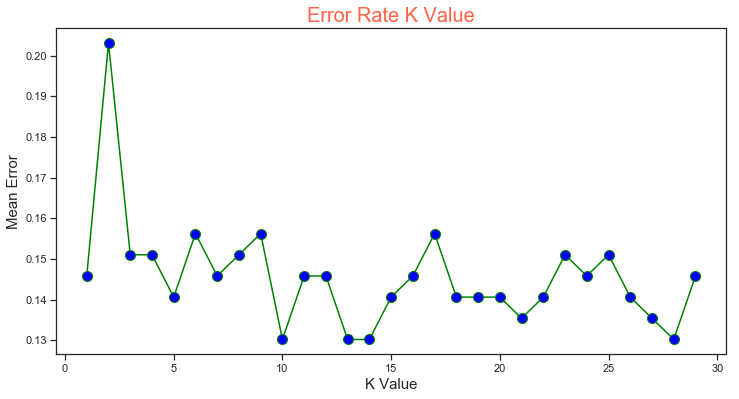

In [39]:

# Calculating error for K values between 1 and 30
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='green', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value',fontsize=20, color='tomato')
plt.xlabel('K Value',fontsize=15)
plt.ylabel('Mean Error',fontsize=15)

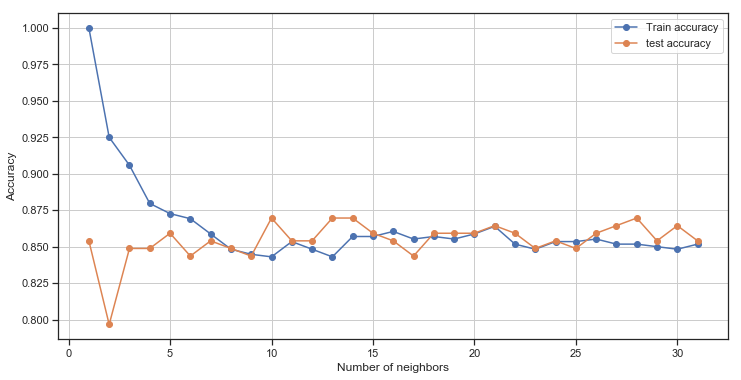

In [40]:
neighbors= np.arange(1,32)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracy[i]=knn_model.score(X_train, y_train)
    test_accuracy[i]=knn_model.score(X_test, y_test)

plt.figure(figsize=(12, 6))    
plt.plot(neighbors, train_accuracy, label='Train accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='test accuracy', marker='o')  
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [41]:

knn_classifier=KNeighborsClassifier(n_neighbors=1, metric='manhattan', p=2).fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print("confusion_matrix:\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(' Accuracy=',knn_classifier.score(X_test, y_test).round(3)*100,('%'))


confusion_matrix:

[[81 15]
 [14 82]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        96
           1       0.85      0.85      0.85        96

   micro avg       0.85      0.85      0.85       192
   macro avg       0.85      0.85      0.85       192
weighted avg       0.85      0.85      0.85       192

 Accuracy= 84.89999999999999 %


# DecisionTreeClassifier

In [54]:

dtc = DecisionTreeClassifier().fit(X_train, y_train)                          
y_pred=dtc.predict(X_test)
print("confusion_matrix:\n")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree Classifier Accuracy=',accuracy_score(y_test,y_pred).round(4)*100,('%'))


confusion_matrix:

[[75 21]
 [15 81]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        96
           1       0.79      0.84      0.82        96

   micro avg       0.81      0.81      0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192

Decision Tree Classifier Accuracy= 81.25 %


# LogisticRegression

In [43]:

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8385
F1 Score:  0.841


# BaggingClassifier

In [44]:


bgcl = BaggingClassifier(n_estimators=50, max_samples= .2, bootstrap=True, oob_score=True, random_state=20)
bgcl = bgcl.fit(X_train, y_train)
pred_BG =bgcl.predict(X_test)
print('Bagging Classifier Accuracy=',accuracy_score(y_test, pred_BG).round(4)*100,('%'))   

Bagging Classifier Accuracy= 84.38 %


# Gradient Boosting Classifier

In [45]:

param_grid = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
    'n_estimators':[140, 150, 160], 
    'max_depth':[3, 4, 5]       
     }
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=param_grid, scoring='f1',cv = 5,verbose=0,n_jobs=-1).fit(X_train, y_train)
print("best score: ", GV_GBC.best_score_)
print("best param: ", GV_GBC.best_params_)

e:\Users\EXIR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best score:  0.8821709442835852
best param:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}


In [46]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8385
F1 Score:  0.8488


# Ada Boost Classifier

In [47]:

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state = 42))

param_grid = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
              'n_estimators':[140, 150, 160]}

GV_ABC = GridSearchCV(ABC,param_grid=param_grid, scoring='f1',n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)
y_pred = GV_ABC.predict(X_test)



print("\nReport:\n%s\n"%classification_report(y_test, y_pred))
print("best param: ", GV_ABC.best_params_)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

e:\Users\EXIR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        96
           1       0.84      0.89      0.86        96

   micro avg       0.86      0.86      0.86       192
   macro avg       0.86      0.86      0.86       192
weighted avg       0.86      0.86      0.86       192


best param:  {'learning_rate': 0.05, 'n_estimators': 150}
Accuracy score:  0.8594
F1 Score:  0.8629


# thanks for your attention